In [1]:
## Overview 

In [15]:
### Import Libraries
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import decomposition
from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score 
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

import time
import sys
sys.path.insert(0,'../../../../../utils/')
from helper_functions_genus import *
#import helper_function custom library
from model_builder_genus import ModelBuilder
pd.options.mode.chained_assignment = None
%matplotlib inline 

In [16]:
### Import and Clean Data
#load spectra data
df_aug = pd.read_csv("../../../../../data/refCanopies0802_0630.txt")
df_sep = pd.read_csv("../../../../../data/refCanopies0917_0630.txt")
df_oct = pd.read_csv("../../../../../data/refCanopies1016_0630.txt")

#load tree data
df_tree = pd.read_csv("../../../../../data/Export_Output_2_0630_Genus.txt")

In [17]:
#holds evaluation metrics for species_hyper_ind
curr_evals = []

In [18]:
## August Image Models

In [19]:
### No Dimension Reduction

In [20]:
#clean and split data
mb_aug = ModelBuilder(df_aug,df_tree)
x_train,x_test,y_train,y_test = mb_aug.split_data()

data cleaning in progress ...

data cleaning completed.
   ROIID  IDwithROI  396.33  398.01   399.7  401.38  403.07  404.75  406.44  \
2      1          3 -0.0028 -0.0016 -0.0002  0.0014  0.0032  0.0052  0.0075   
3      1          4 -0.0028 -0.0016 -0.0002  0.0014  0.0032  0.0052  0.0075   
4      1          5  0.0064  0.0058  0.0057  0.0058  0.0065  0.0078  0.0080   
5      1          6  0.0064  0.0058  0.0057  0.0058  0.0065  0.0078  0.0080   
6      1          7  0.0064  0.0058  0.0057  0.0058  0.0065  0.0078  0.0080   

   408.13  ...  886.78   888.5  890.22  891.94  893.66  895.38   897.1  \
2  0.0092  ...  0.2337  0.2359  0.2388  0.2425   0.247  0.2526  0.2440   
3  0.0092  ...  0.2337  0.2359  0.2388  0.2425   0.247  0.2526  0.2440   
4  0.0078  ...  0.3018  0.3044  0.3063  0.3079   0.309  0.3098  0.3109   
5  0.0078  ...  0.3018  0.3044  0.3063  0.3079   0.309  0.3098  0.3109   
6  0.0078  ...  0.3018  0.3044  0.3063  0.3079   0.309  0.3098  0.3109   

   898.81  900.53  TARGE

In [21]:
#build random forest model with ntree = 100
model_aug = mb_aug.build_model(x_train, y_train)

model building in progress ...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished


model building completed.


[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.1s finished


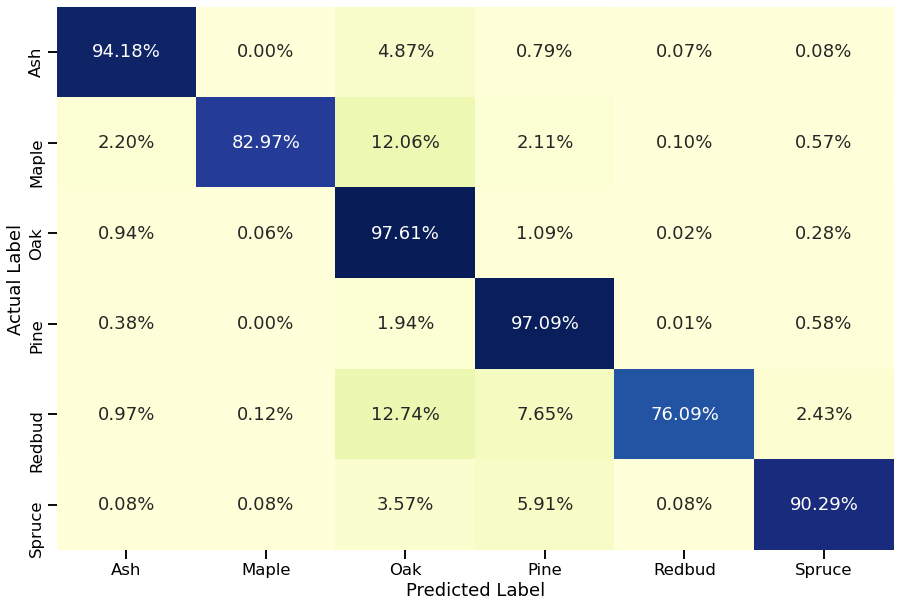

In [22]:
#evaluate the model
#create a confusion matrix
labels = ["Ash","Maple","Oak","Pine","Redbud","Spruce"]
nclasses = 6
model_name = 'genus_hyper_ind_nd_aug'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_aug,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [23]:
#save the model
save_model(model_aug,model_name)

In [24]:
### Dimension Reduction with PCA

In [25]:
#build pca model with n_compoments = 30
x_train,x_test,y_train,y_test, pc_plot = mb_aug.build_pca_model(30)
model_aug_pc = mb_aug.build_model(x_train,y_train)

model building in progress ...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished


model building completed.


In [26]:
#pc_plot
#make_pc_plot(pc_plot)

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.1s finished


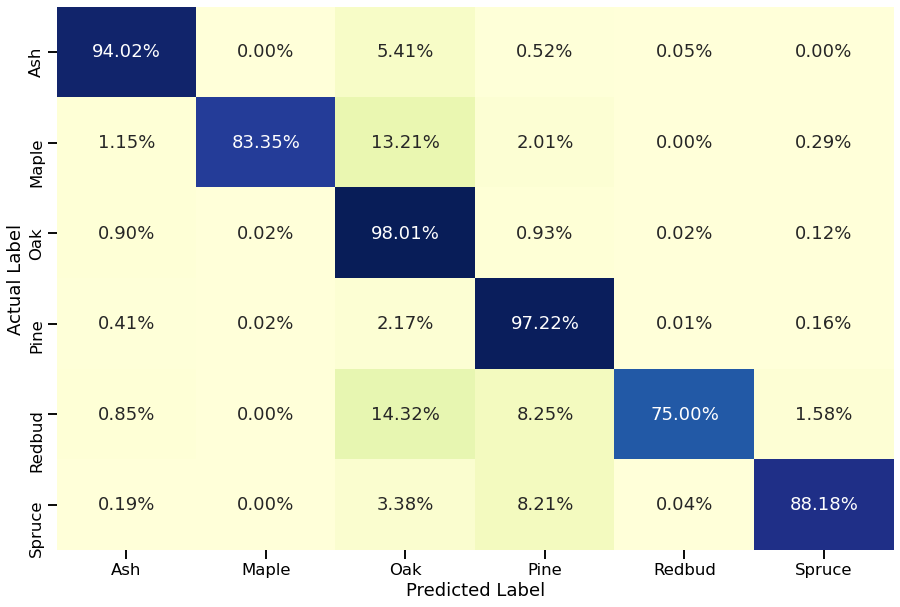

In [27]:
#evaluate the model
model_name = 'genus_hyper_ind_pc30_aug'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_aug_pc,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [28]:
#save the model
save_model(model_aug_pc,model_name)

In [29]:
## September Image Models

In [30]:
### No Dimension Reduction

In [31]:
#clean and split data
mb_sep = ModelBuilder(df_sep,df_tree)
x_train,x_test,y_train,y_test = mb_sep.split_data()

data cleaning in progress ...

data cleaning completed.
   ROIID  IDwithROI  396.33  398.01   399.7  401.38  403.07  404.75  406.44  \
2      1          3  0.0004  0.0011  0.0017  0.0023  0.0028  0.0033  0.0037   
3      1          4  0.0004  0.0011  0.0017  0.0023  0.0028  0.0033  0.0037   
4      1          5  0.0008  0.0041  0.0069  0.0091  0.0106  0.0121  0.0113   
5      1          6  0.0191  0.0144  0.0106  0.0080  0.0064  0.0058  0.0063   
6      1          7  0.0191  0.0144  0.0106  0.0080  0.0064  0.0058  0.0063   

   408.13  ...  886.78   888.5  890.22  891.94  893.66  895.38   897.1  \
2  0.0035  ...  0.1648  0.1659  0.1689  0.1722  0.1760  0.1803  0.1847   
3  0.0035  ...  0.1648  0.1659  0.1689  0.1722  0.1760  0.1803  0.1847   
4  0.0116  ...  0.2383  0.2381  0.2397  0.2414  0.2430  0.2454  0.2481   
5  0.0086  ...  0.2541  0.2553  0.2564  0.2579  0.2603  0.2636  0.2650   
6  0.0086  ...  0.2541  0.2553  0.2564  0.2579  0.2603  0.2636  0.2650   

   898.81  900.53  TARGE

In [32]:
#build random forest model with ntree = 100
model_sep = mb_sep.build_model(x_train, y_train)

model building in progress ...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished


model building completed.


[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.1s finished


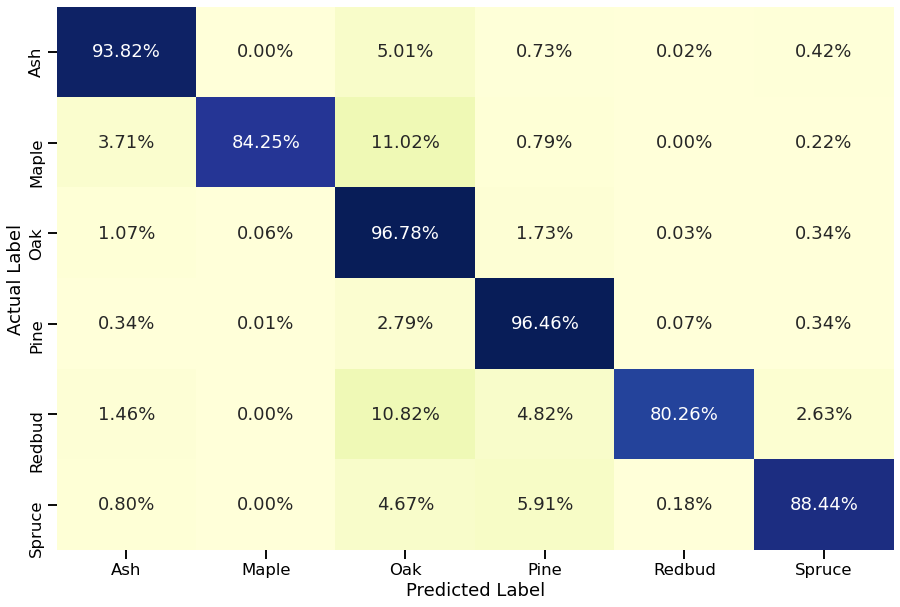

In [33]:
model_name = 'genus_hyper_ind_nd_sep'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_sep,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [34]:
#save the model
save_model(model_sep,model_name)

In [35]:
### Dimension Reduction with PCA

In [36]:
#build pca model with n_compoments = 30
x_train,x_test,y_train,y_test,pc_plot = mb_sep.build_pca_model(30)
model_sep_pc = mb_sep.build_model(x_train,y_train)

model building in progress ...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished


model building completed.


In [37]:
#pc_plot
#make_pc_plot(pc_plot)

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.2s finished


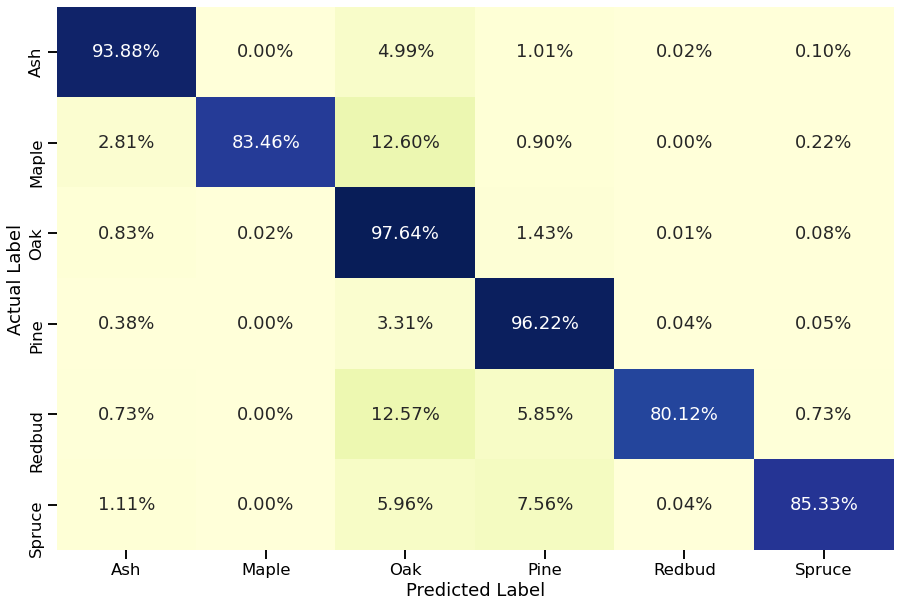

In [38]:
#evaluate the model
model_name = 'genus_hyper_ind_pc30_sep'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_sep_pc,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [39]:
#save the model
save_model(model_sep_pc,model_name)

In [40]:
## October Image Models

In [41]:
### No Dimension Reduction

In [42]:
#clean and split data
mb_oct = ModelBuilder(df_oct,df_tree)
x_train,x_test,y_train,y_test = mb_oct.split_data()

data cleaning in progress ...

data cleaning completed.
    ROIID  IDwithROI  396.33  398.01   399.7  401.38  403.07  404.75  406.44  \
5       1          6 -0.0018 -0.0006  0.0003  0.0009  0.0012  0.0012  0.0005   
6       1          7 -0.0018 -0.0006  0.0003  0.0009  0.0012  0.0012  0.0005   
17      1         18 -0.0018 -0.0006  0.0003  0.0009  0.0012  0.0012  0.0005   
18      1         19 -0.0018 -0.0006  0.0003  0.0009  0.0012  0.0012  0.0005   
19      1         20 -0.0035 -0.0032 -0.0027 -0.0019 -0.0010  0.0002  0.0021   

    408.13  ...  886.78   888.5  890.22  891.94  893.66  895.38   897.1  \
5   0.0001  ...   0.157  0.1579  0.1598  0.1629  0.1666  0.1709  0.1789   
6   0.0001  ...   0.157  0.1579  0.1598  0.1629  0.1666  0.1709  0.1789   
17  0.0001  ...   0.157  0.1579  0.1598  0.1629  0.1666  0.1709  0.1789   
18  0.0001  ...   0.157  0.1579  0.1598  0.1629  0.1666  0.1709  0.1789   
19  0.0032  ...   0.197  0.2012  0.2062  0.2121  0.2188  0.2263  0.2189   

    898.81  

In [43]:
#build random forest model with ntree = 100
model_oct = mb_oct.build_model(x_train, y_train)

model building in progress ...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.8s finished


model building completed.


[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.1s finished


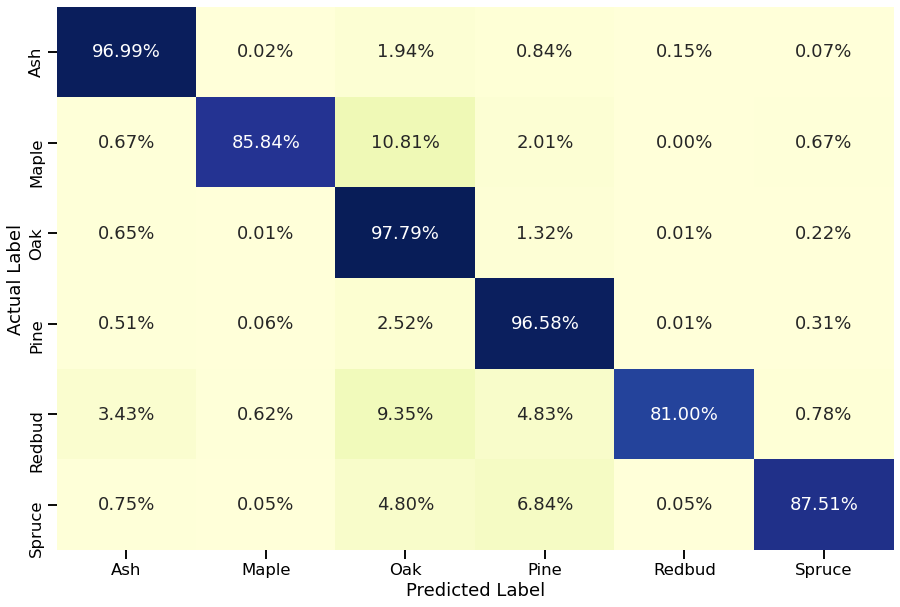

In [44]:
#evaluate the model
model_name = 'genus_hyper_ind_nd_oct'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_oct,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [45]:
#save the model
save_model(model_oct,model_name)

In [46]:
### Dimension Reduction with PCA

In [47]:
#build pca model with n_compoments = 30
x_train,x_test,y_train,y_test,pc_plot = mb_oct.build_pca_model(30)
model_oct_pc = mb_oct.build_model(x_train,y_train)

model building in progress ...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


model building completed.


In [49]:
#pc_plot
#make_pc_plot(pc_plot)

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.1s finished


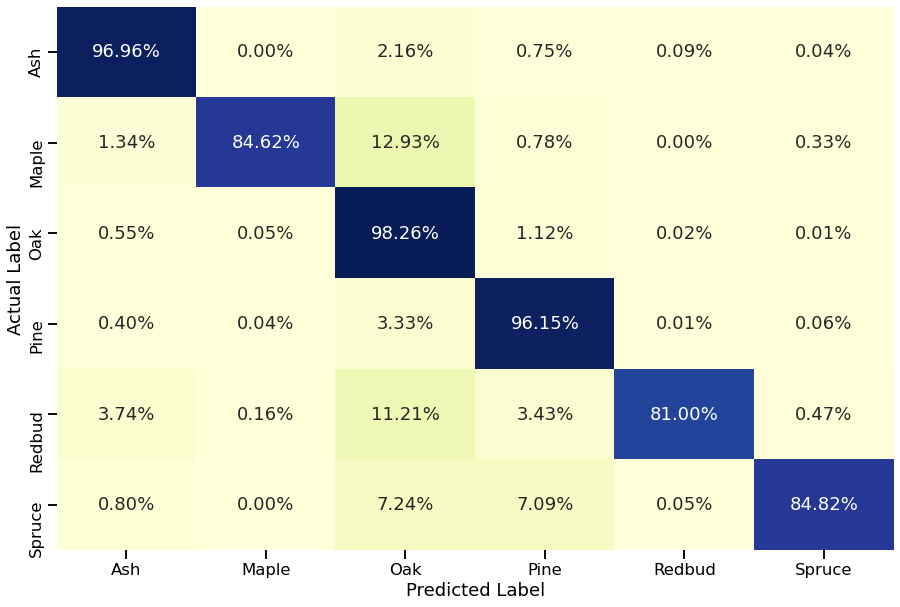

In [50]:
#evaluate the model
model_name = 'genus_hyper_ind_pc30_oct'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_oct_pc,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [51]:
#save the model
save_model(model_oct_pc,model_name)

In [52]:
#concatenate all current results into one dataframe
df_curr_evals = pd.concat(curr_evals)
#save the current results
df_curr_evals.to_csv('genus_hyper_ind_summary_results.csv')


In [53]:
df_curr_evals

,Model,Train Accuracy(%),Test Accuracy(%)
0,genus_hyper_ind_nd_aug,99.898423,95.049571
0,genus_hyper_ind_pc30_aug,99.898423,95.006176
0,genus_hyper_ind_nd_sep,99.903646,94.604157
0,genus_hyper_ind_pc30_sep,99.903646,94.600472
0,genus_hyper_ind_nd_oct,99.907418,95.663957
0,genus_hyper_ind_pc30_oct,99.907418,95.475433
